In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import pandas as pd

import wrangle as w


In [ ]:
df = pd.read_csv("zillow.csv")

In [ ]:
train, validate, test = w.split_clean_zillow(df)

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.


In [ ]:
train

In [ ]:
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(df)

In [ ]:
pd.DataFrame(x_train_scaled)

In [ ]:
array([[0.42857143, 0.33333333, 0.20823584, ..., 0.05334269, 1.        ,
        0.        ],
       [0.28571429, 0.33333333, 0.29340197, ..., 0.12961483, 0.        ,
        0.        ],
       [0.28571429, 0.16666667, 0.13773202, ..., 0.12355739, 0.        ,
        1.        ],
       ...,
       [0.28571429, 0.16666667, 0.16580877, ..., 0.20269535, 0.        ,
        0.        ],
       [0.42857143, 0.5       , 0.44673218, ..., 0.20175139, 0.        ,
        1.        ],
       [0.57142857, 0.33333333, 0.31882702, ..., 0.20503755, 0.        ,
        0.        ]])

In [88]:
train, validate, test = w.split_clean_zillow(df)

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.
21610 outliers removed from tax.
0 outliers removed from Orange.
0 outliers removed from Ventura.

Total of 54860 outliers removed.


In [4]:
x_train

,bedroom,bathroom,area,property_value,year,tax,Orange,Ventura
95764,3.0,2.0,1336.0,112579.0,1972.0,1106.58,1,0
26088,2.0,2.0,1882.0,212447.0,1925.0,2679.76,0,0
1873299,2.0,1.0,884.0,241196.0,1927.0,2554.82,0,1
285118,2.0,1.0,833.0,274064.0,1950.0,3490.04,0,0
1900458,4.0,3.0,2840.0,287244.0,1967.0,6415.56,0,0
...,...,...,...,...,...,...,...,...
1842433,2.0,1.0,928.0,438312.0,1941.0,4877.69,0,0
1107106,5.0,3.0,3112.0,391906.0,1965.0,4650.96,1,0
1984259,2.0,1.0,1064.0,305243.0,1941.0,4187.11,0,0
614562,3.0,3.0,2865.0,366909.0,1979.0,4167.64,0,1


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [30]:
# MinMAX
def mm_scale(x_train):
    for col in x_train.columns:
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.MinMaxScaler()
        scaler.fit(train_col[[col]])


        x_train_scaled = scaler.transform(train_col)
        x_validate_scaled = scaler.transform(validate_col)
        # x_test_scaled = scaler.transform(x_test)

        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_col, bins=25, ec='black')
        plt.xlabel(col)
        plt.title('Original')
        
        plt.subplot(122)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Min Max Scaled')
        plt.xlabel(col)
        plt.show()
        
def std_scale(x_train):
    for col in x_train.columns:    
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.StandardScaler()

        scaler.fit(train_col[[col]])

        x_train_scaled = scaler.transform(train_col)
        x_validate_scaled = scaler.transform(validate_col)


        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_col, bins=25, ec='black')
        plt.xlabel(col)
        plt.title('Original')
        plt.subplot(122)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Standard Scaled')
        plt.xlabel(col)
def robust_scale(x_train):
    '''
    
    '''
    for col in x_train.columns:    
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.RobustScaler()

        scaler.fit(train_col[[col]])

        x_train_scaled = scaler.transform(train_col)
        x_validate_scaled = scaler.transform(validate_col)


        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_col, bins=25, ec='black')
        plt.xlabel(col)
        plt.title('Original')
        plt.subplot(122)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Robust Scaled')
        plt.xlabel(col)

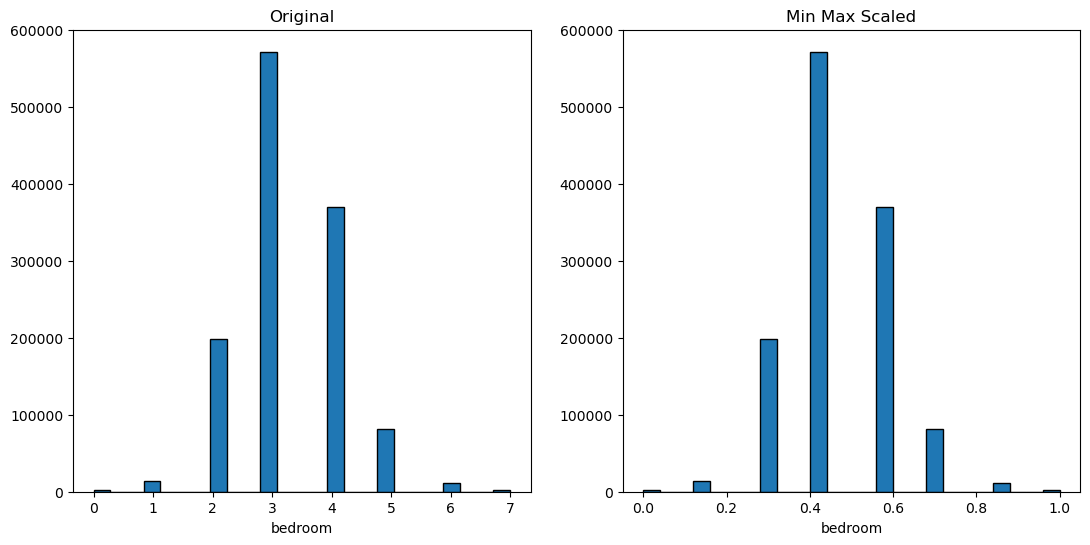

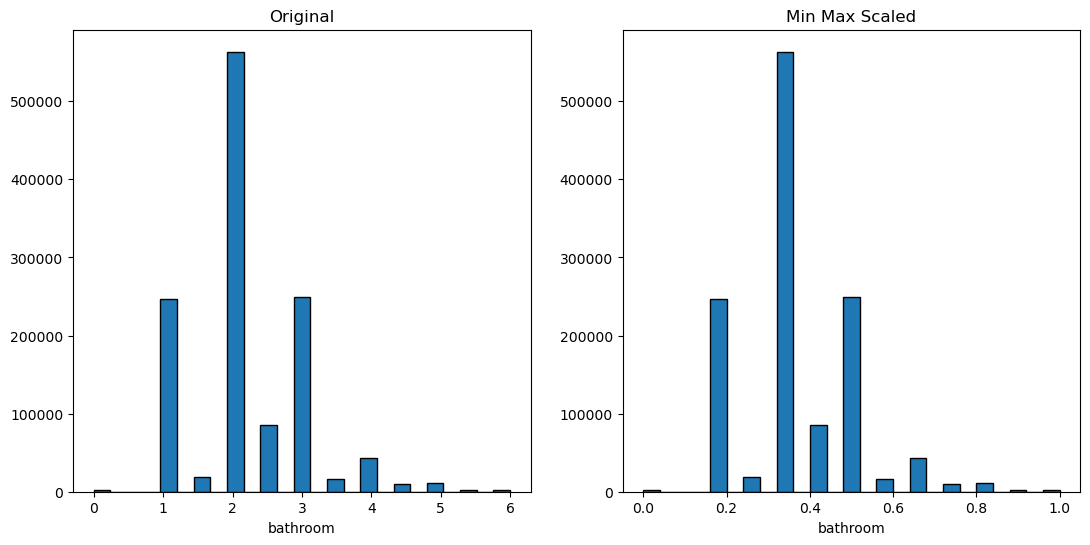

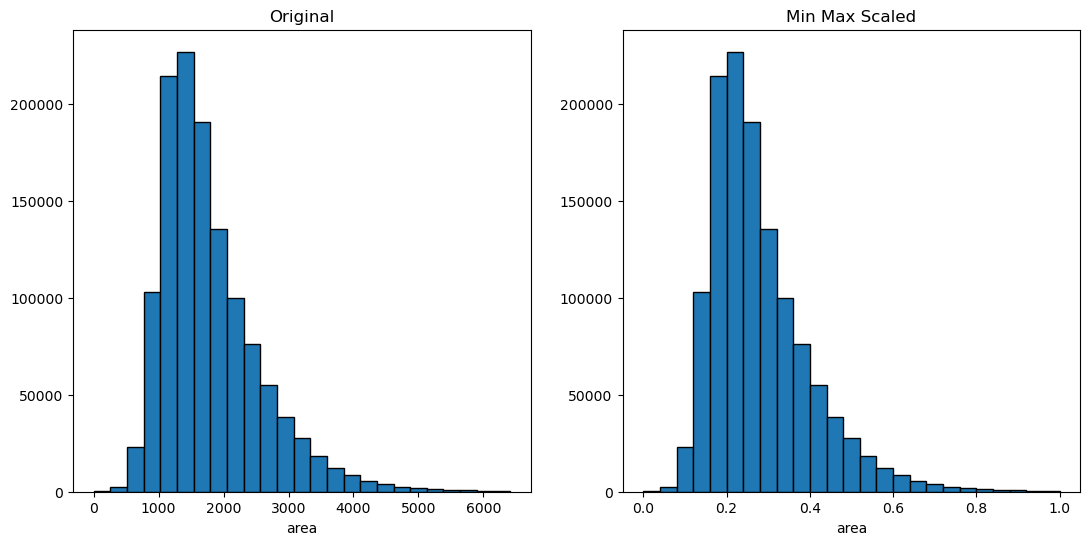

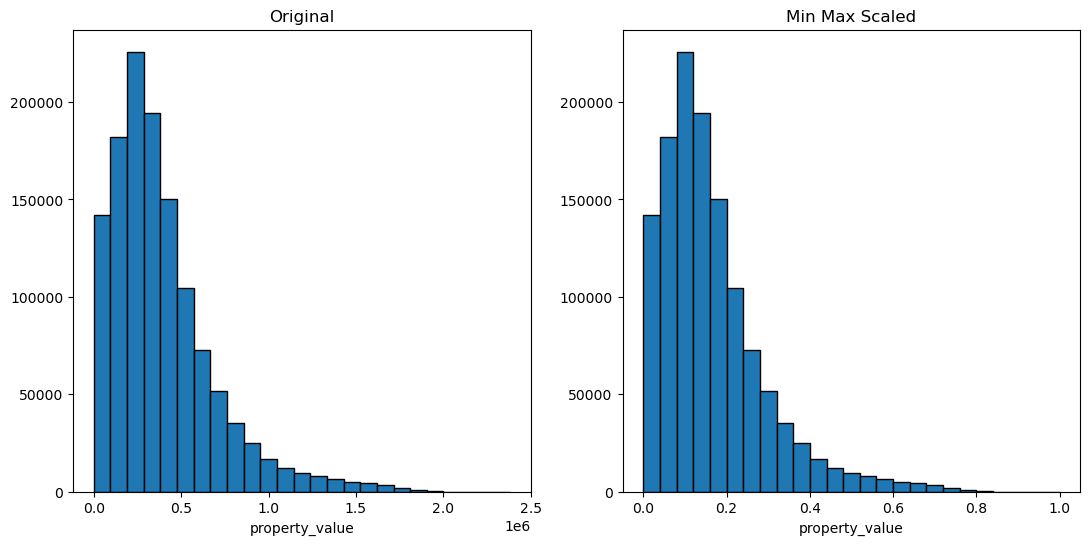

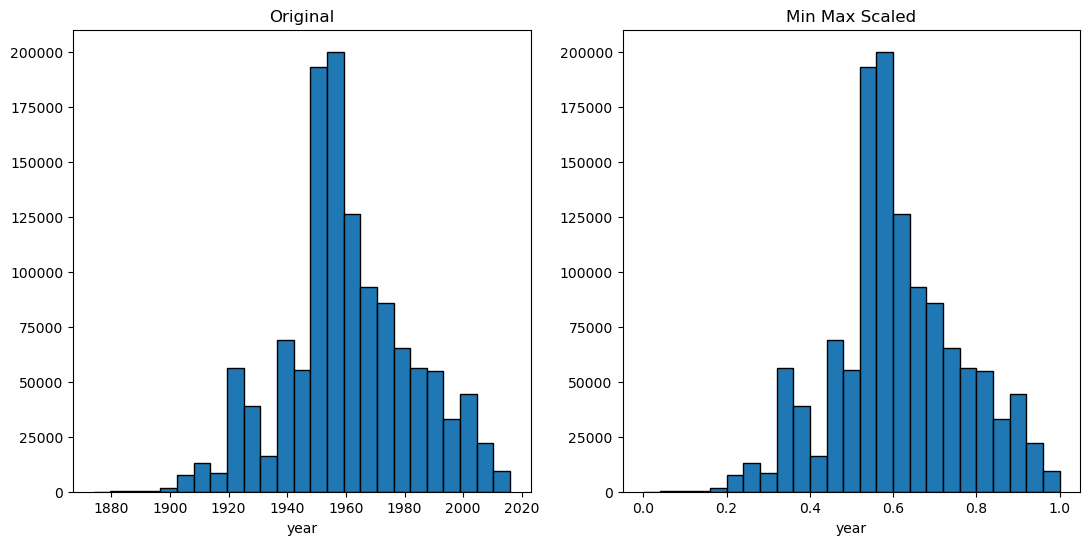

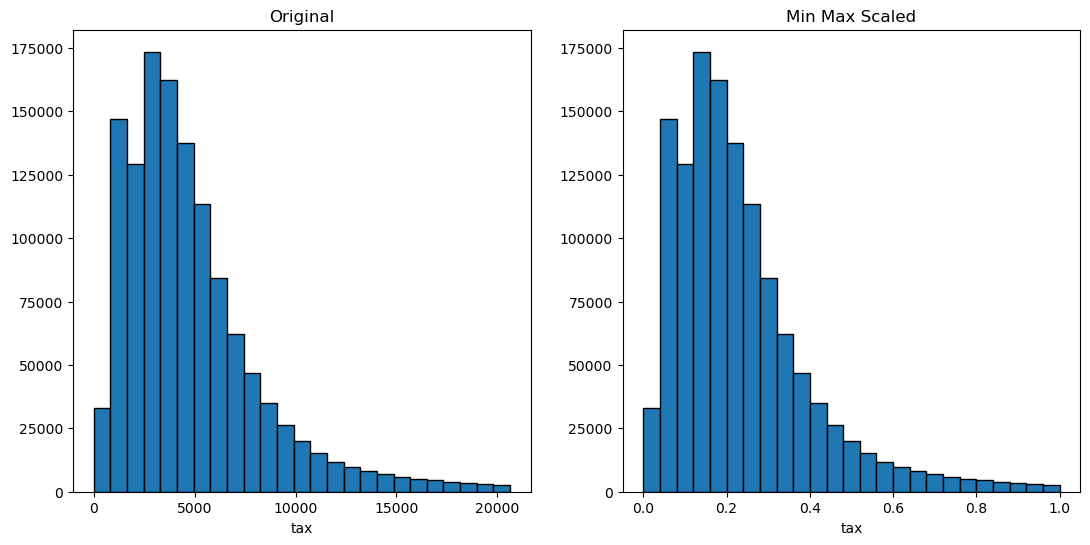

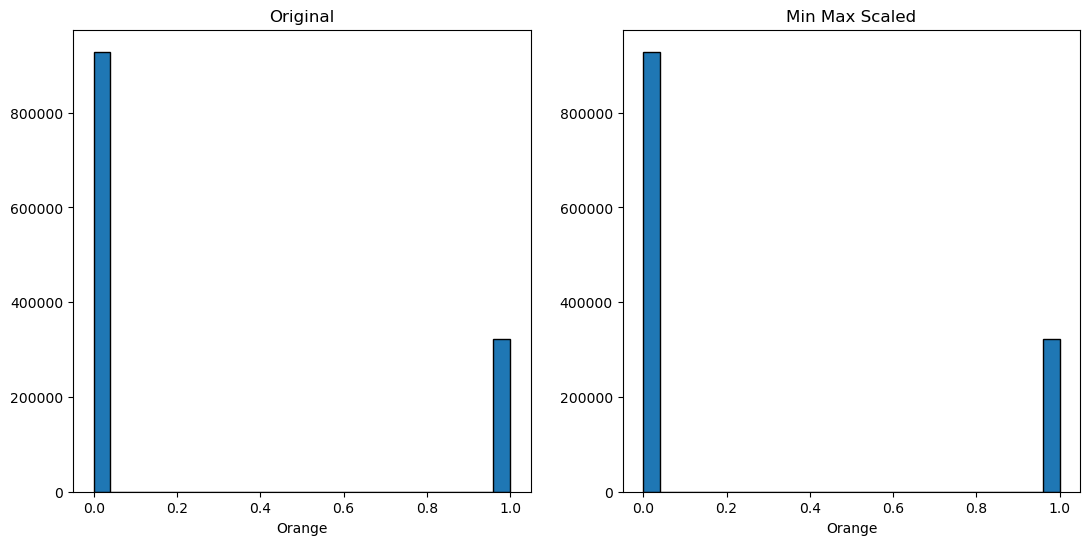

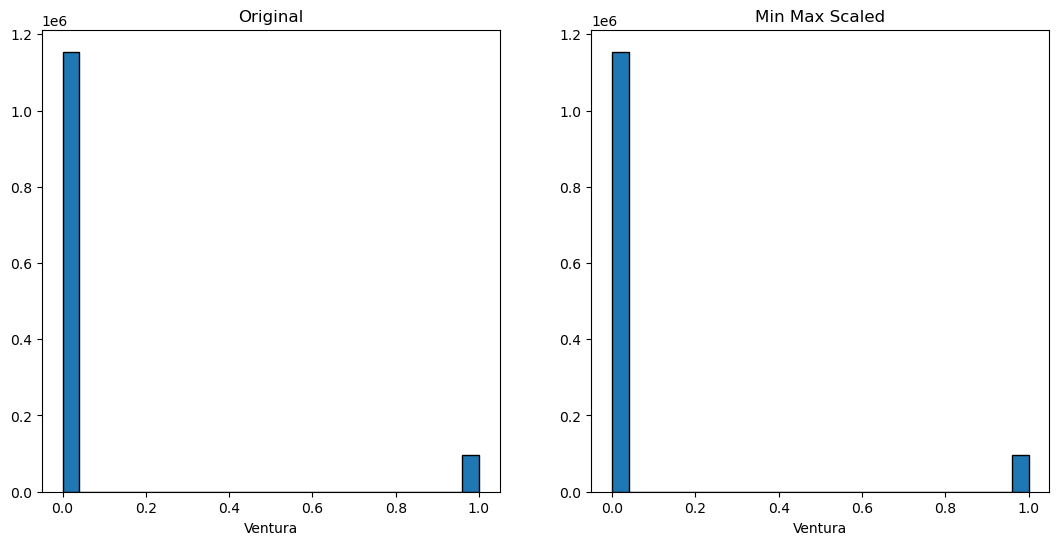

In [31]:
mm_scale(x_train)

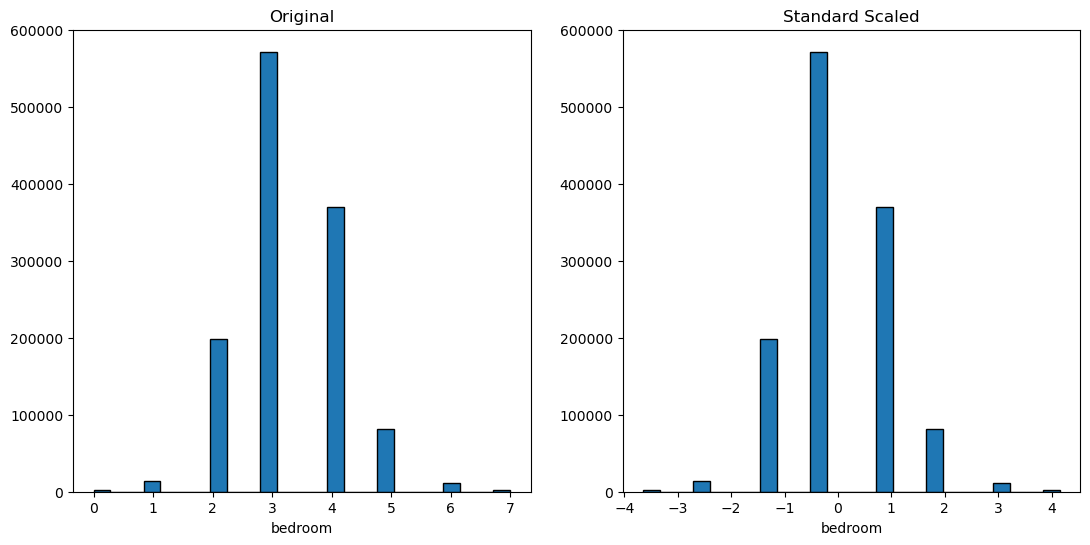

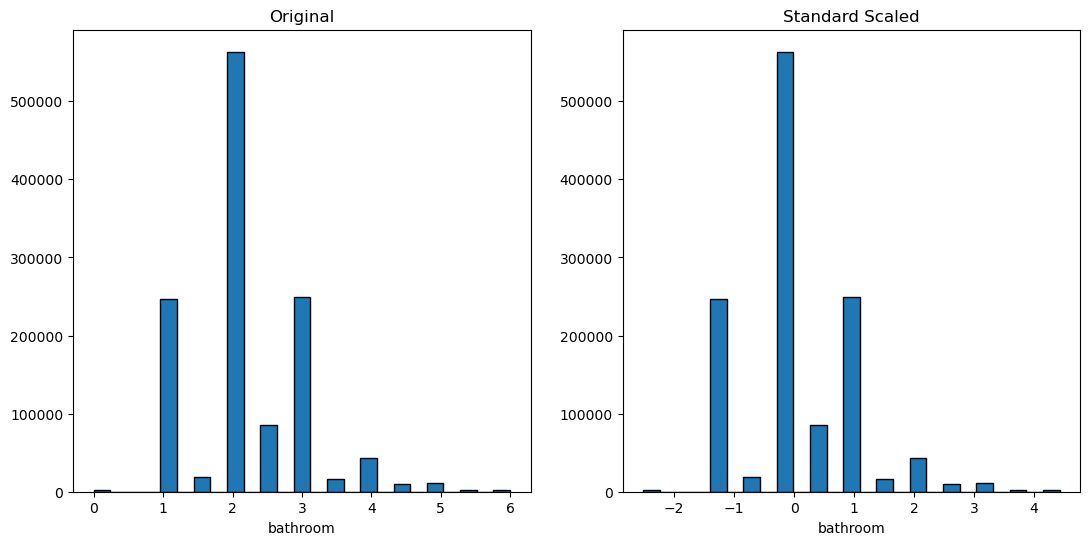

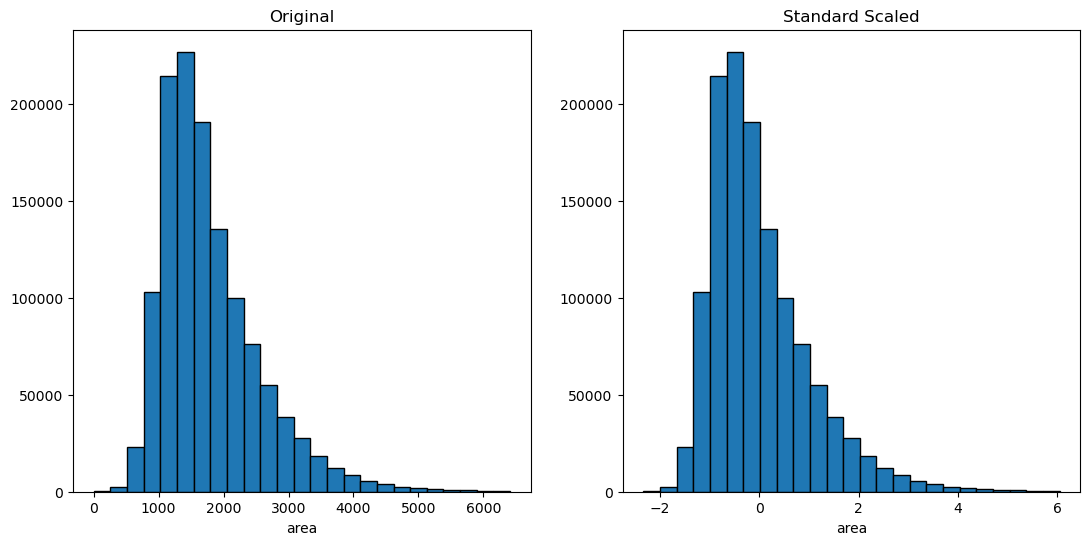

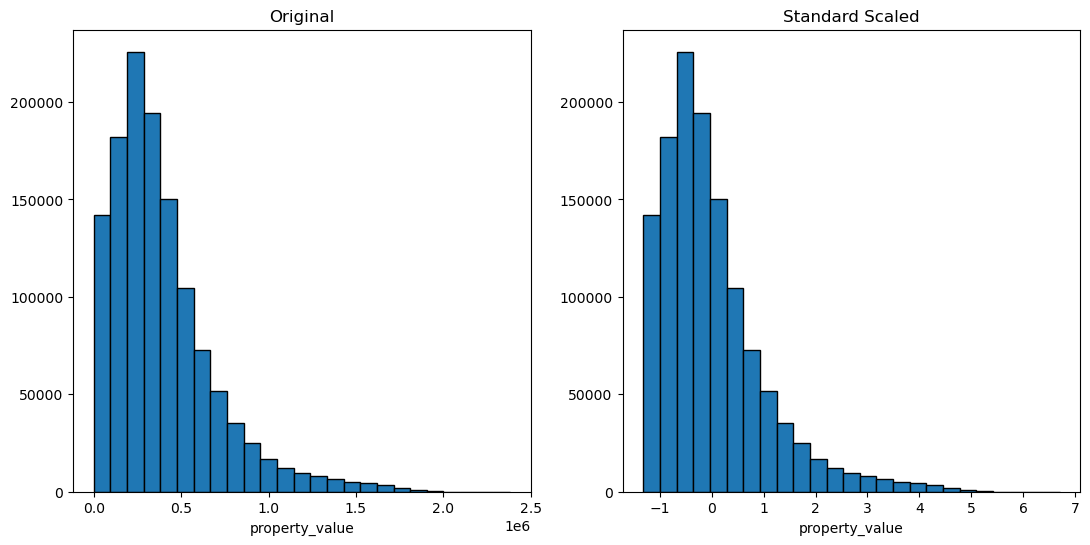

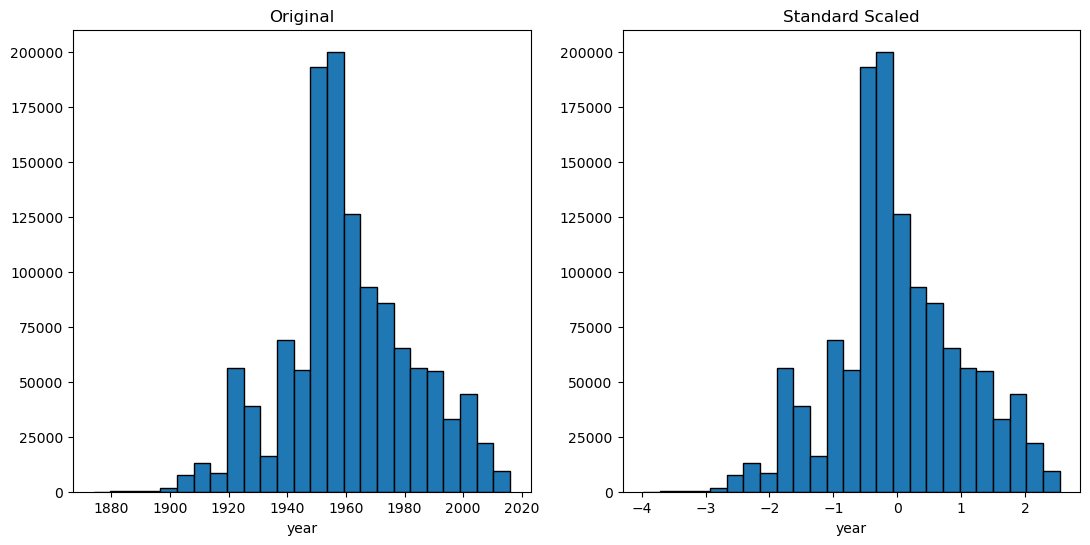

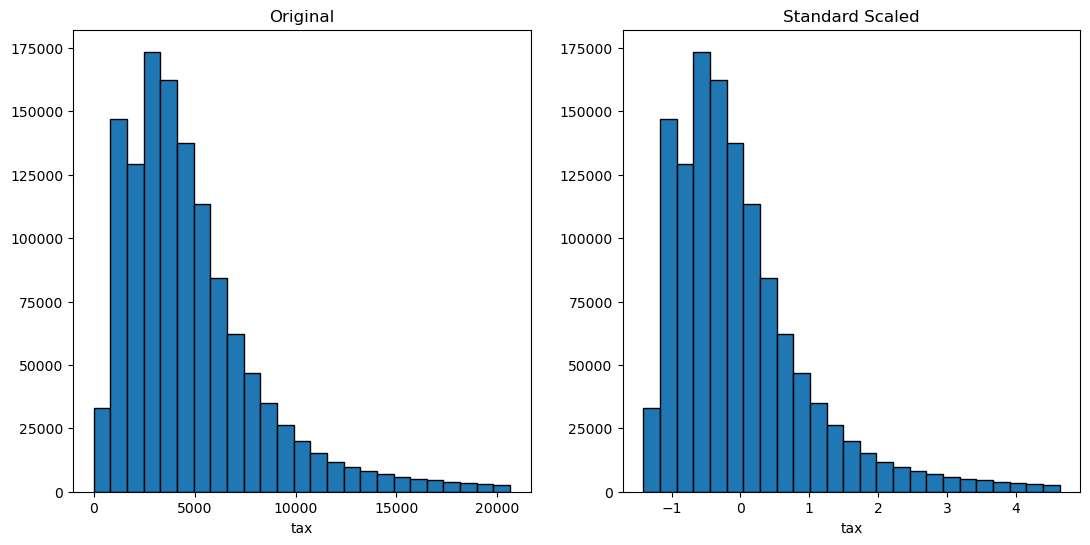

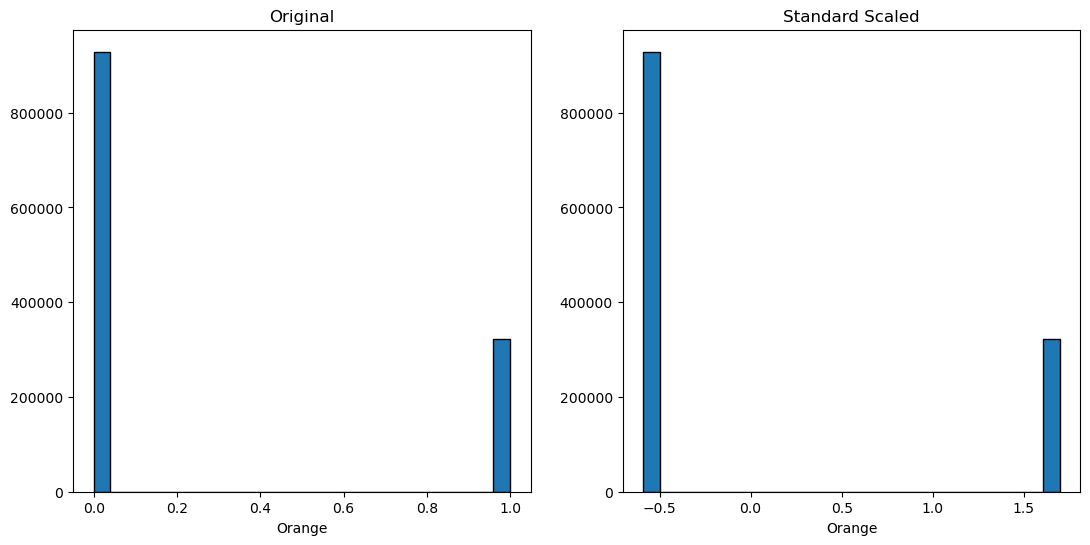

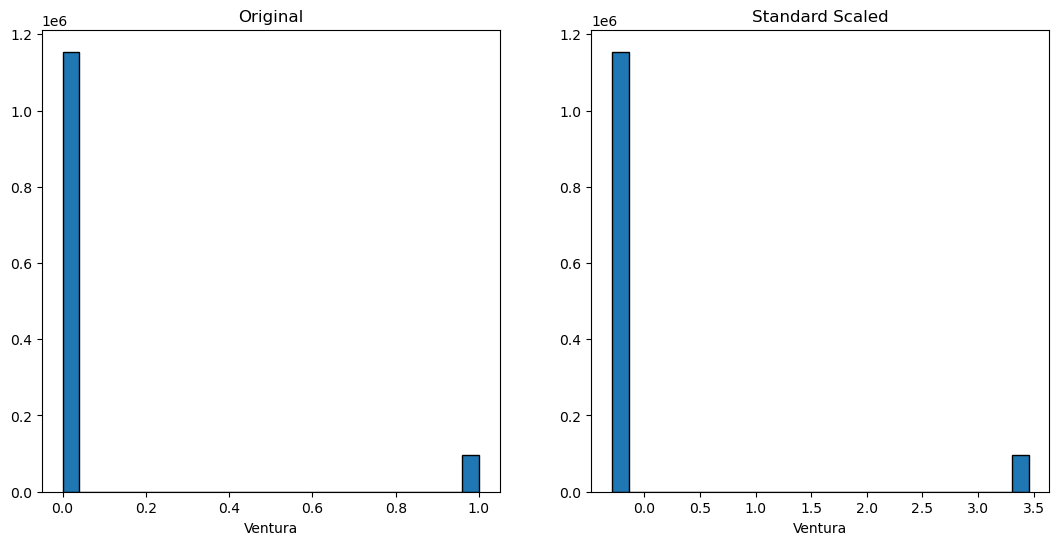

In [47]:
std_scale(x_train)

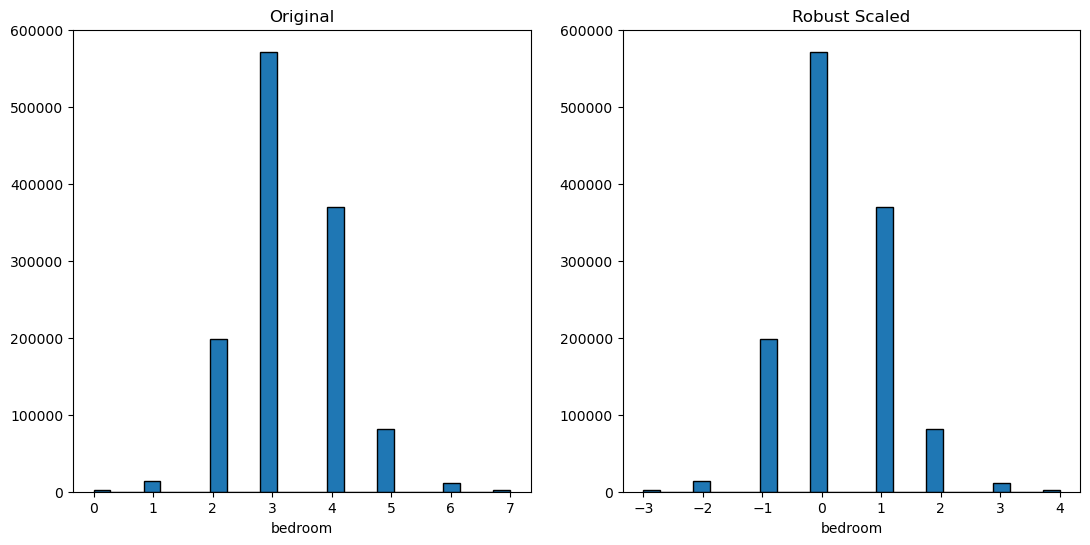

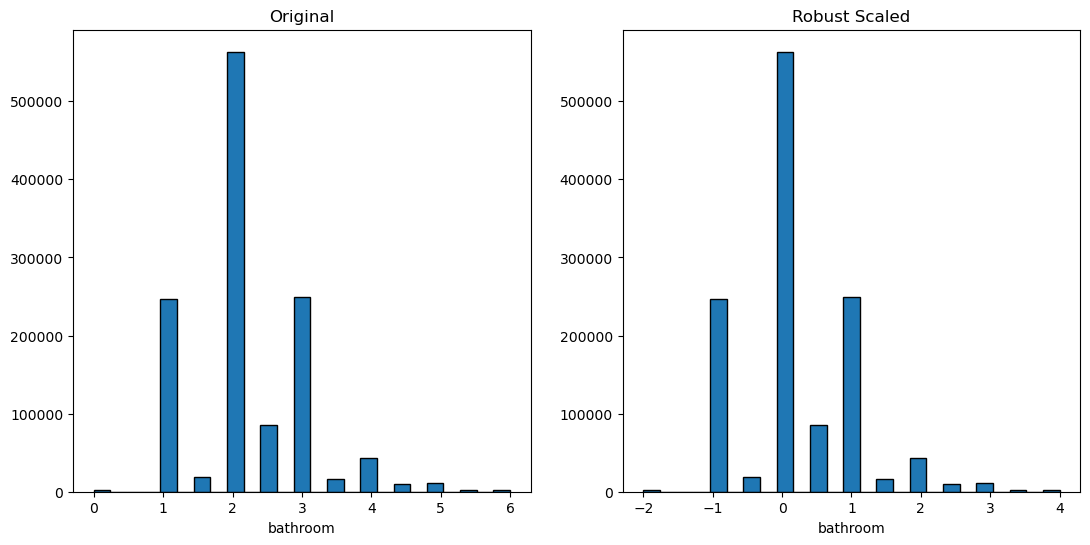

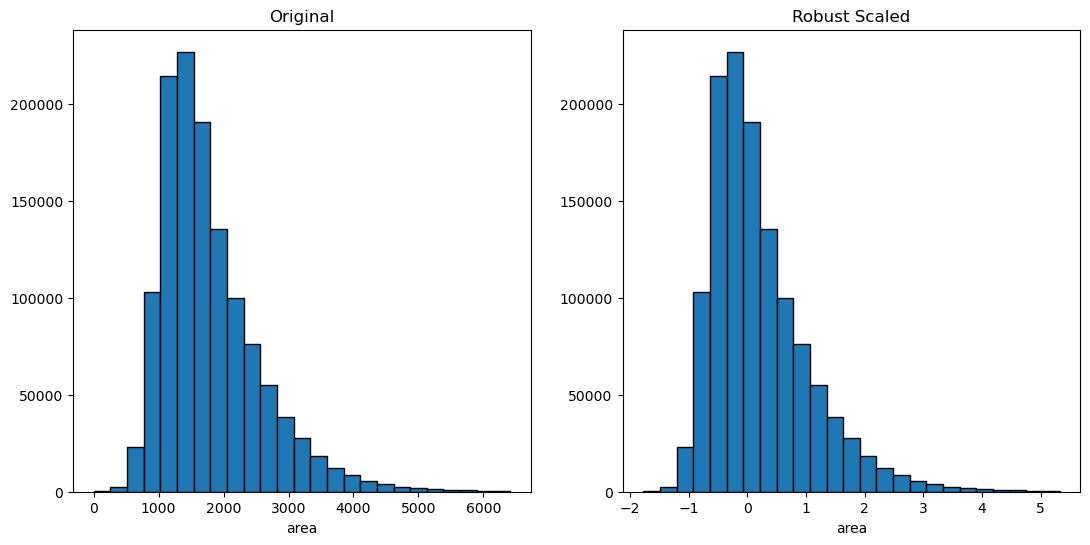

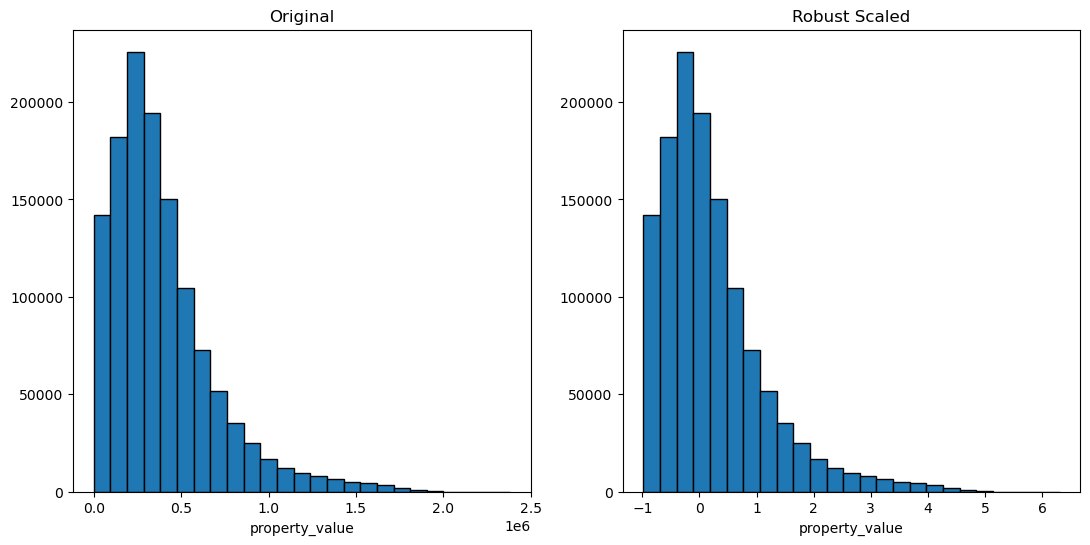

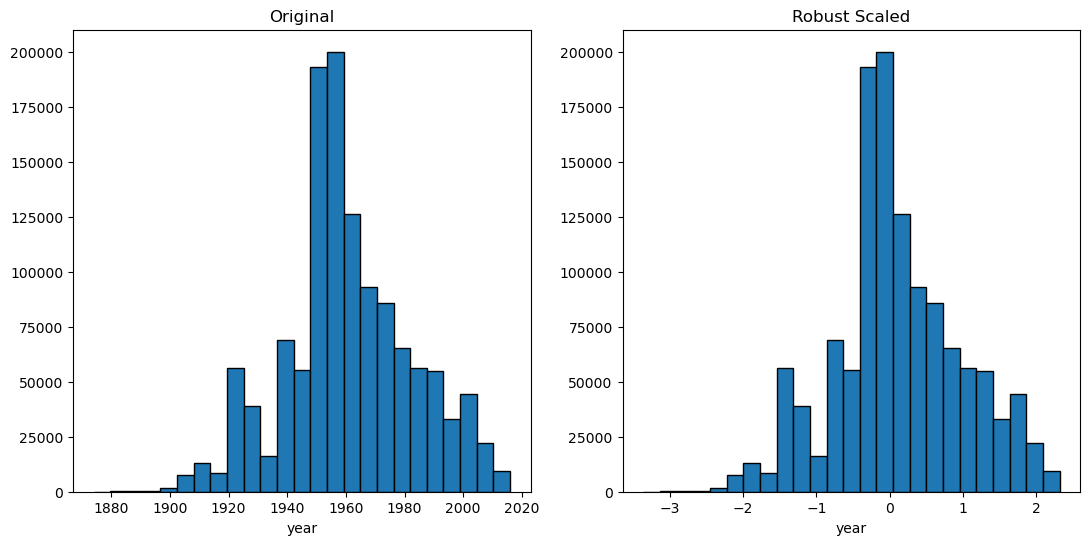

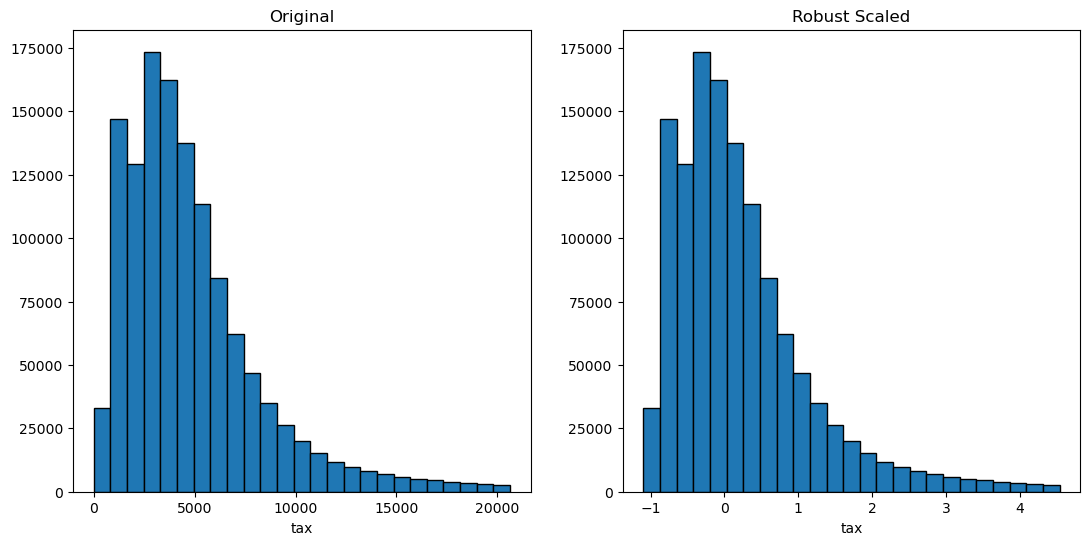

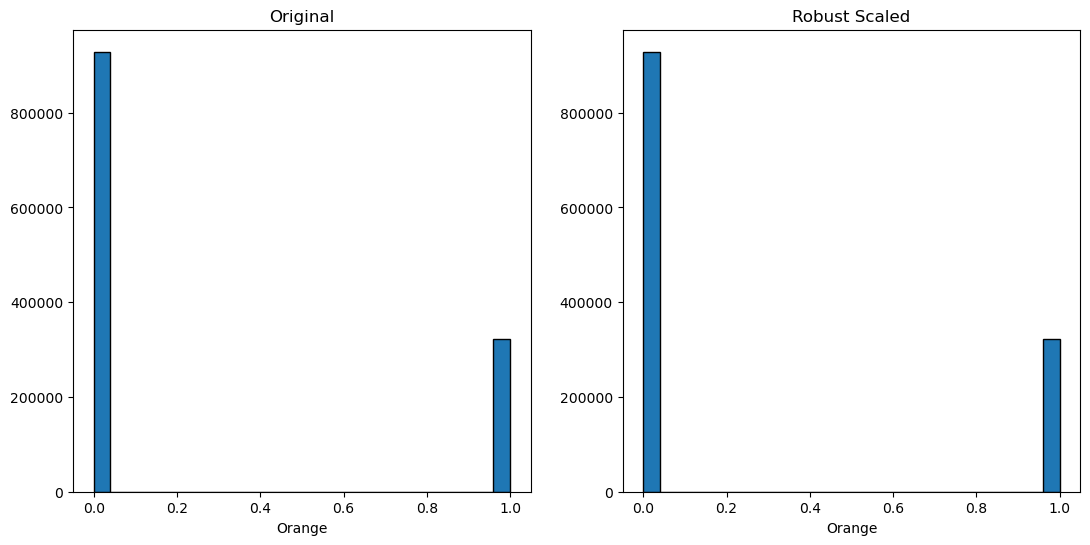

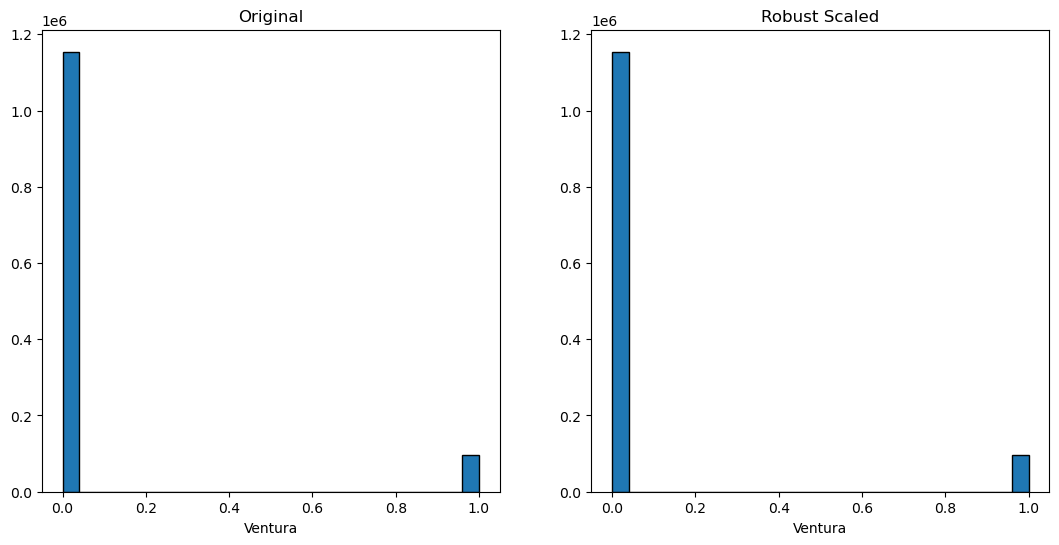

In [33]:
robust_scale(x_train)

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [121]:
def mm_inv_scale(x_train):
    for col in x_train.columns:
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.StandardScaler()
        scaler.fit(train_col[[col]])


        x_train_scaled = scaler.transform(train_col)
#         x_validate_scaled = scaler.transform(validate_col)
        # x_test_scaled = scaler.transform(x_test)
        x_unscaled = scaler.inverse_transform(x_train_scaled)

        plt.figure(figsize=(13, 3))
        plt.subplot(131)
        plt.hist(train_col, bins=25, ec='black')
        plt.title('orignal')
        plt.xlabel(col)


        plt.subplot(132)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Min Max Scaled')
        plt.xlabel(col)

        
        plt.subplot(133)
        plt.hist(x_unscaled, bins=25, ec='black')
        plt.title('Min Max  and then Unscaled')
        plt.xlabel(col)
        plt.show()
        
def std_inv_scale(x_train):
    for col in x_train.columns:
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.MinMaxScaler()
        scaler.fit(train_col[[col]])


        x_train_scaled = scaler.transform(train_col)
#         x_validate_scaled = scaler.transform(validate_col)
        # x_test_scaled = scaler.transform(x_test)
        x_unscaled = scaler.inverse_transform(x_train_scaled)

        plt.figure(figsize=(13, 3))
        plt.subplot(131)
        plt.hist(train_col, bins=25, ec='black')
        plt.title('orignal')
        plt.xlabel(col)


        plt.subplot(132)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Standard Scaled')
        plt.xlabel(col)

        
        plt.subplot(133)
        plt.hist(x_unscaled, bins=25, ec='black')
        plt.title('Standard Scaled and then Unscaled')
        plt.xlabel(col)
        plt.show()
        
def robust_inv_scale(x_train):
    for col in x_train.columns:
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.RobustScaler()
        scaler.fit(train_col[[col]])


        x_train_scaled = scaler.transform(train_col)
        x_validate_scaled = scaler.transform(validate_col)
        # x_test_scaled = scaler.transform(x_test)
        x_unscaled = scaler.inverse_transform(x_train_scaled)

        plt.figure(figsize=(13, 3))
        plt.subplot(131)
        plt.hist(train_col, bins=25, ec='black')
        plt.title('orignal')
        plt.xlabel(col)


        plt.subplot(132)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Min Max Scaled')
        plt.xlabel(col)

        
        plt.subplot(133)
        plt.hist(x_unscaled, bins=25, ec='black')
        plt.title('Min Max Scaled and then Unscaled')
        plt.xlabel(col)
        plt.show()
        
def robust_inv_scale2(train, validate):
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(train)


    x_train_scaled = scaler.transform(train)
    x_validate_scaled = scaler.transform(validate)
    # x_test_scaled = scaler.transform(x_test)
    

    plt.figure(figsize=(13, 3))
    plt.subplot(131)
    plt.hist(train, bins=25, ec='black')
    plt.title('orignal')
    plt.xlabel(col)


    plt.subplot(132)
    plt.hist(x_train_scaled, bins=25, ec='black')
    plt.title('Train Scaled')
    plt.xlabel(col)


    plt.subplot(133)
    plt.hist(x_validate_scaled, bins=25, ec='black')
    plt.title('Validate Scaled')
    plt.xlabel(col)
    plt.show()

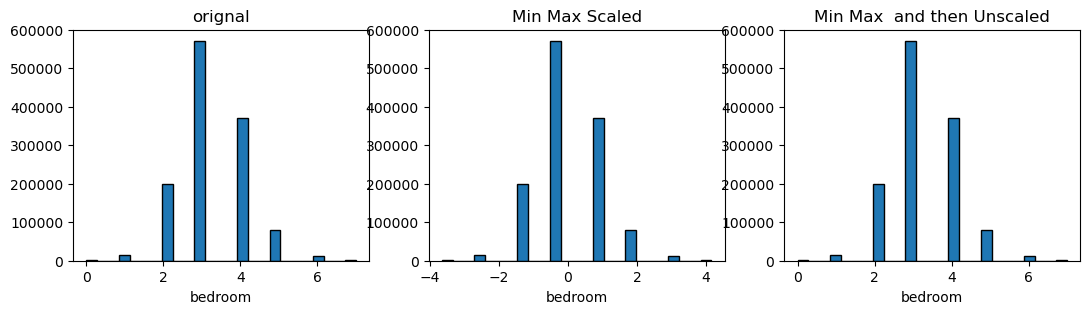

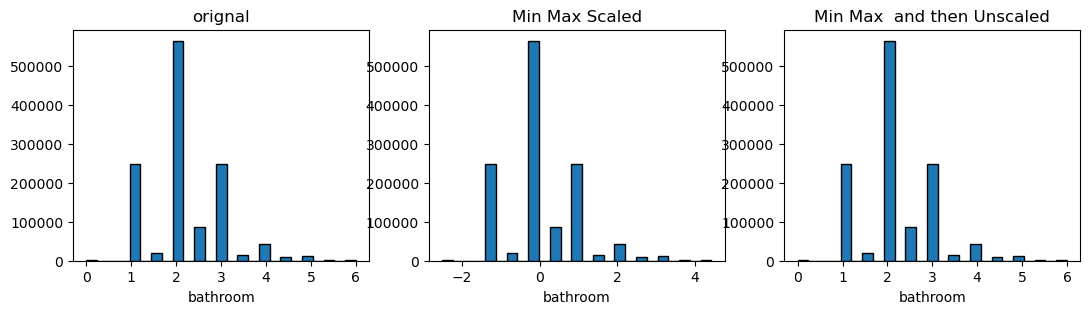

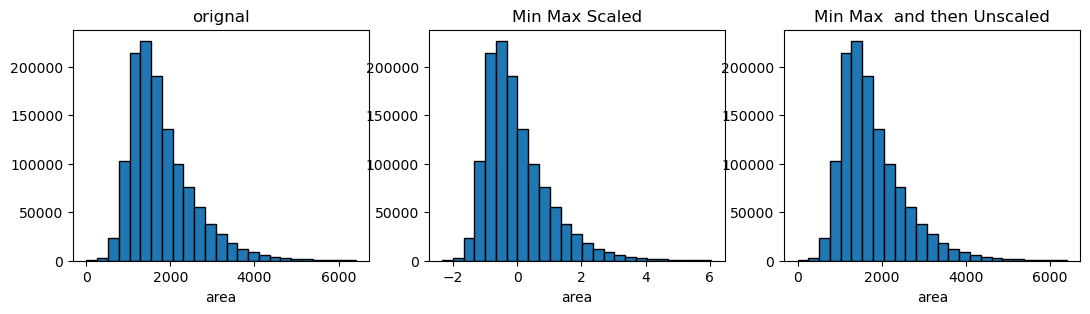

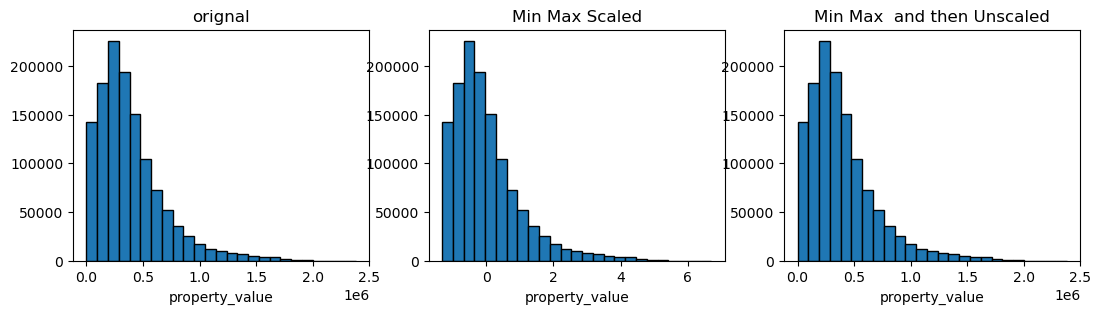

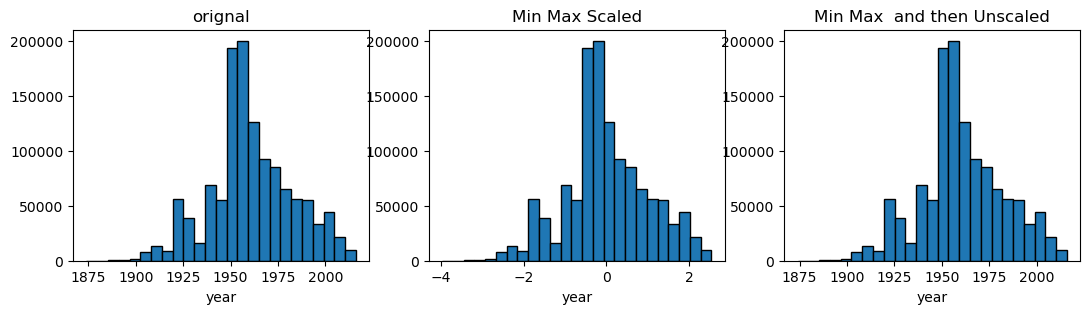

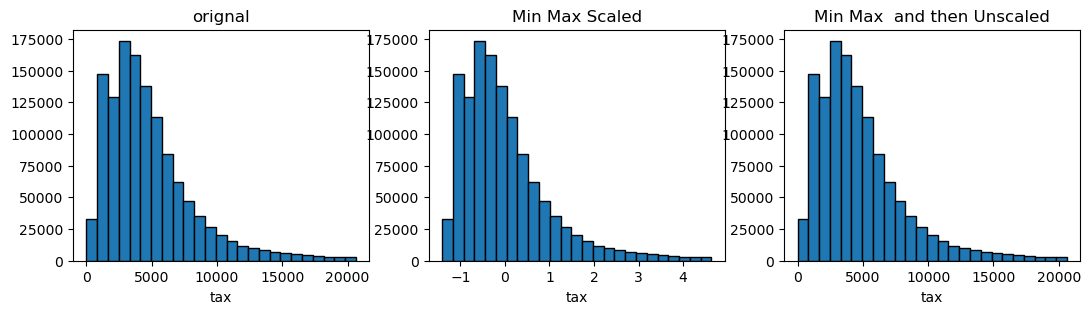

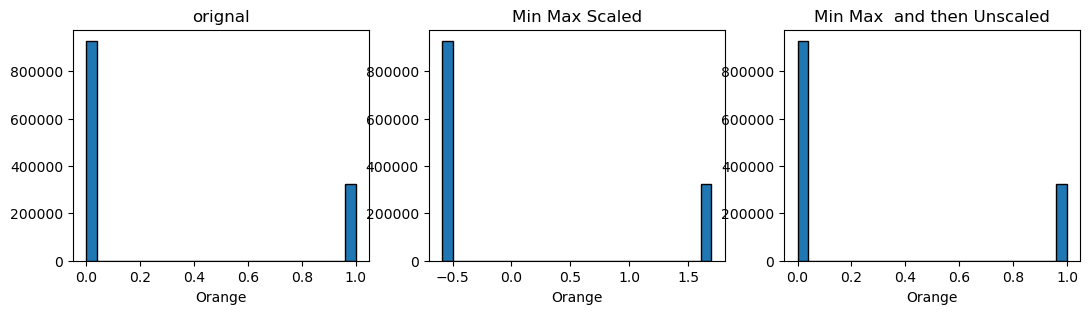

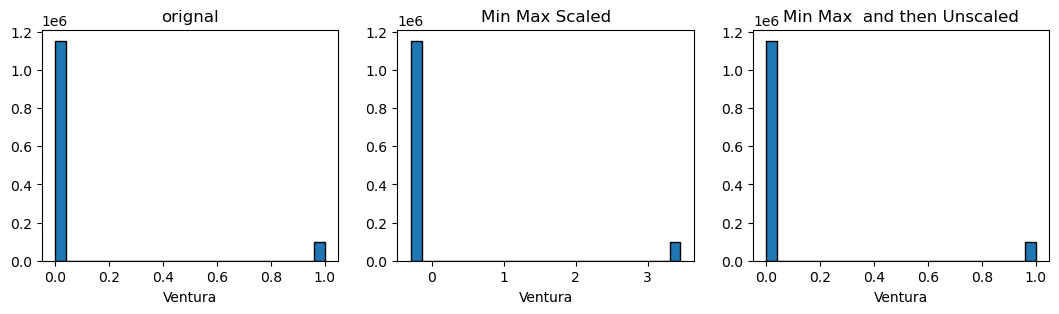

In [68]:
mm_inv_scale(x_train)

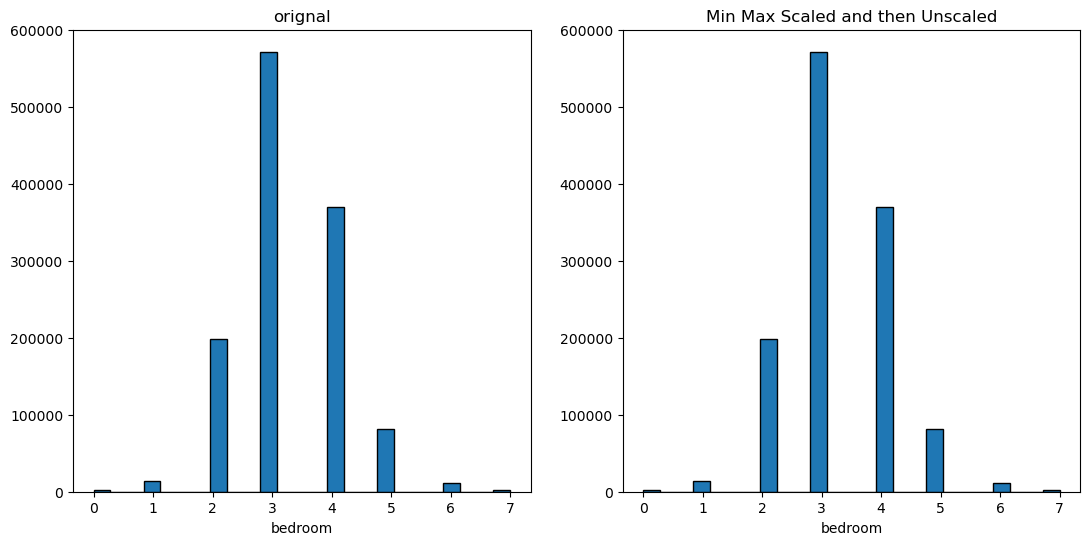

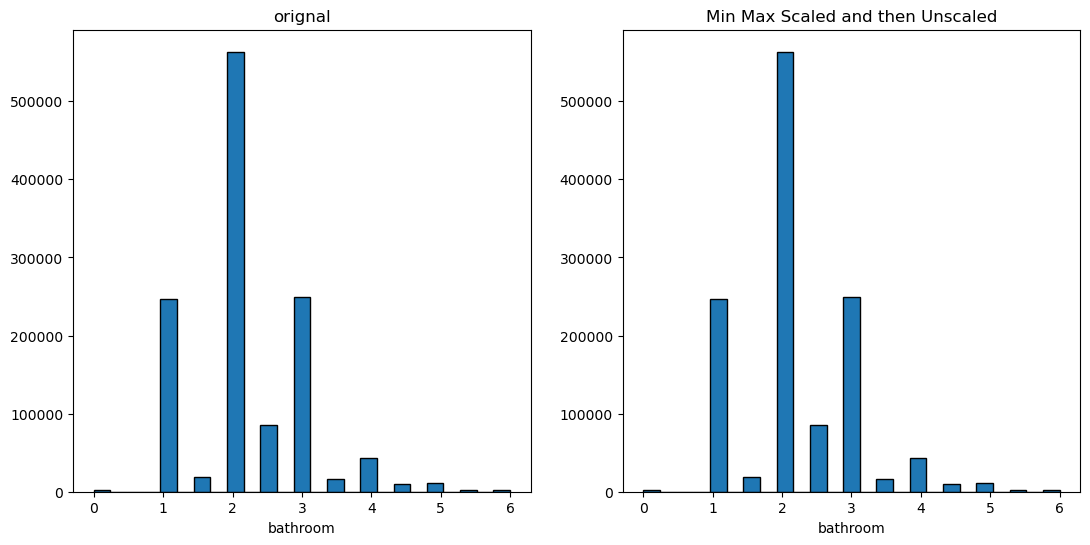

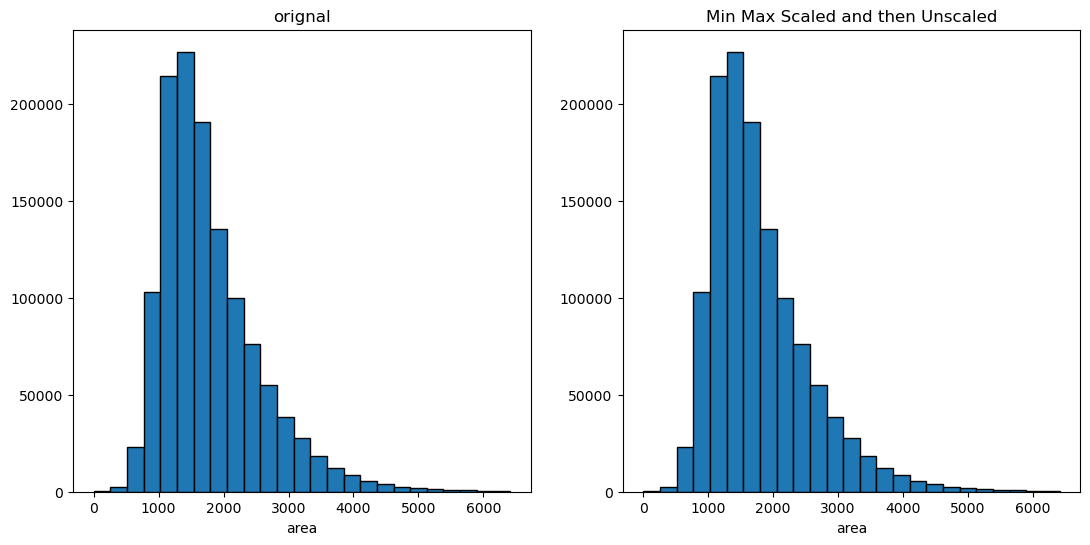

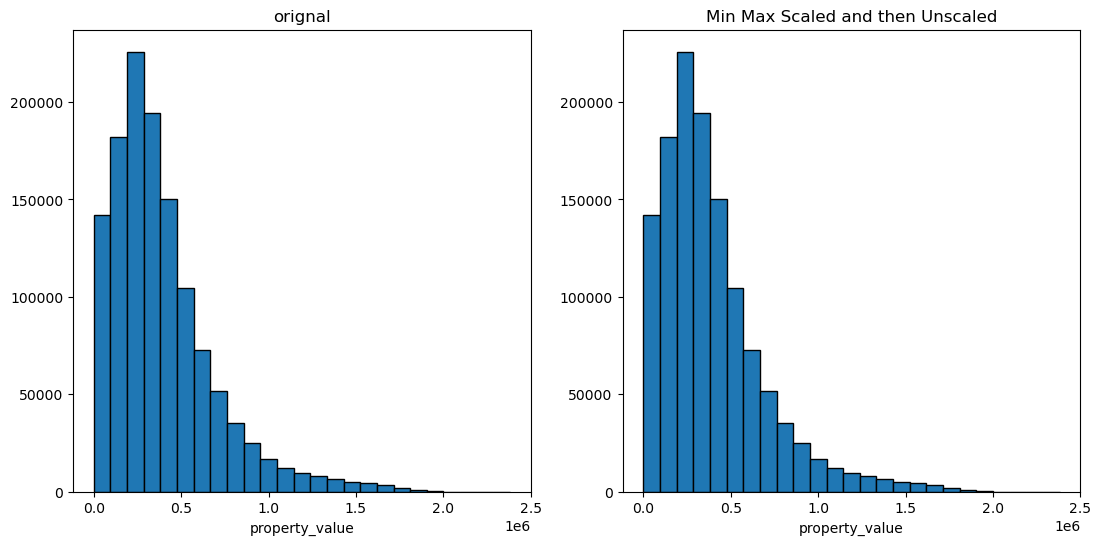

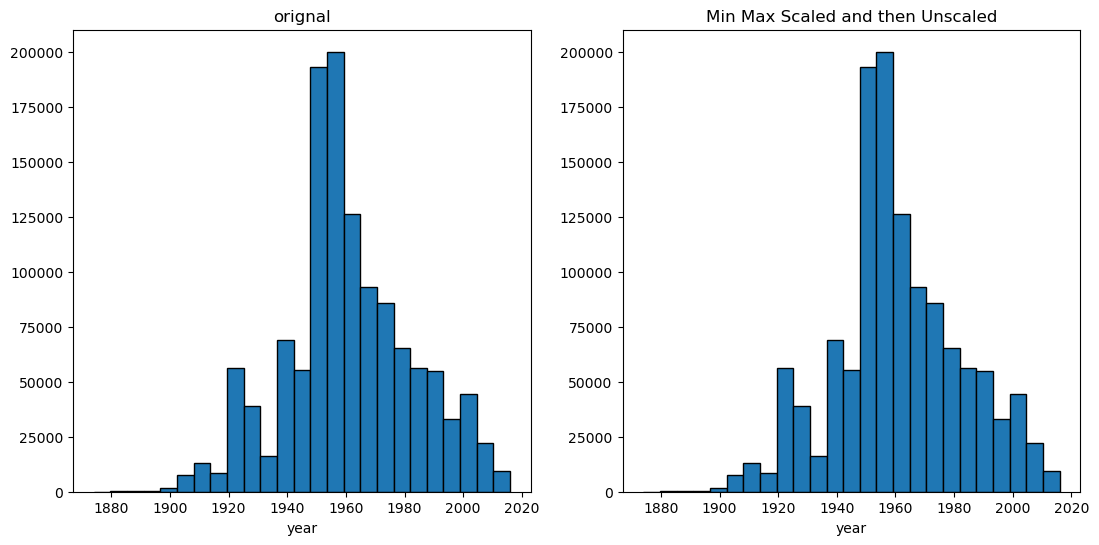

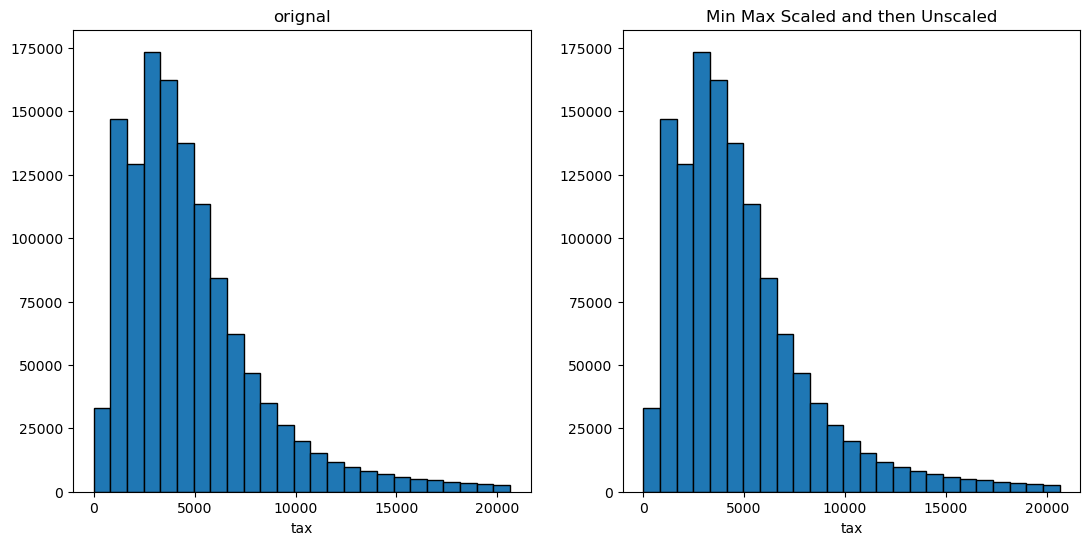

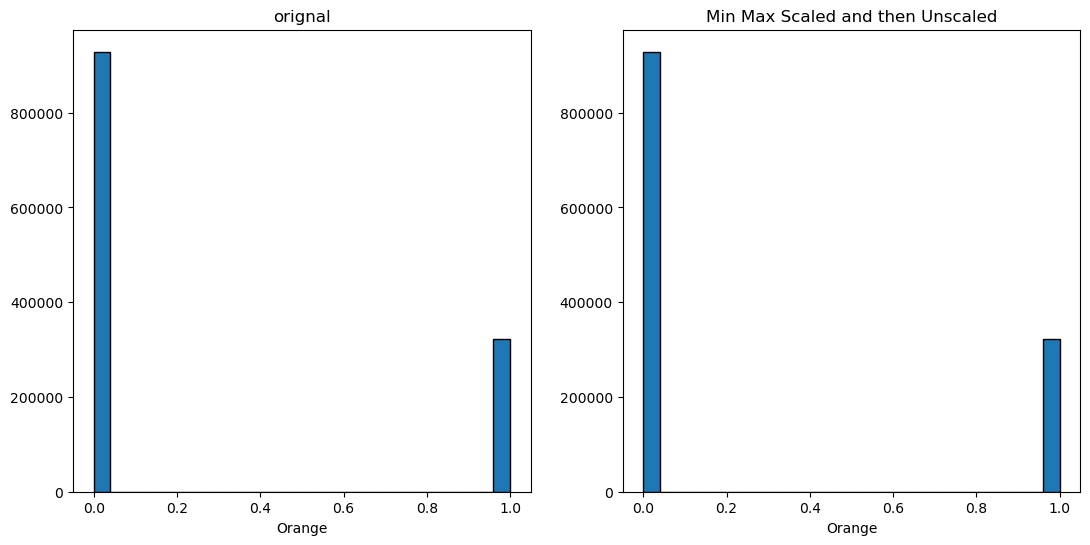

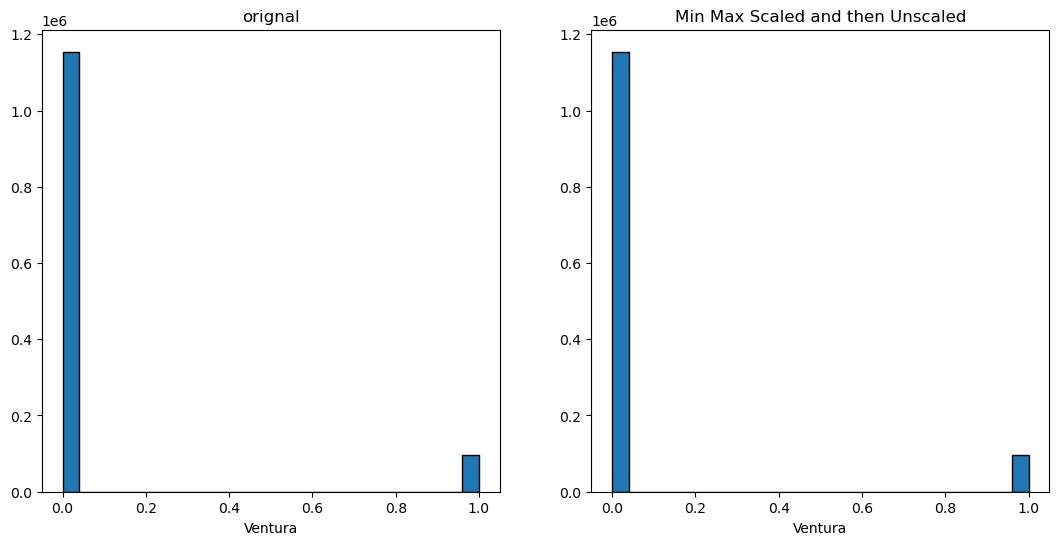

In [48]:
std_inv_scale(x_train)

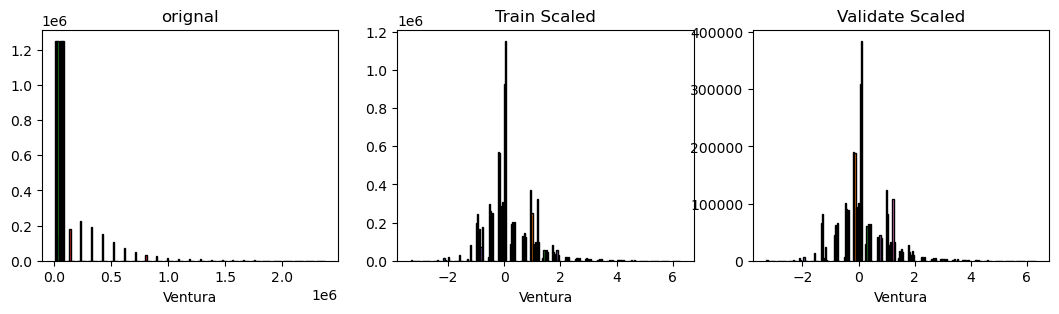

In [123]:
robust_inv_scale2(train, validate)

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [75]:
def quantile_norm(x_train):
    '''
    
    '''
    for col in x_train.columns:    
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

        scaler.fit(train_col[[col]])

        x_train_scaled = scaler.transform(train_col)
        x_validate_scaled = scaler.transform(validate_col)


        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_col, bins=25, ec='black')
        plt.xlabel(col)
        plt.title('Original')
        
        plt.subplot(122)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.title('Quantile Normal Scaled')
        plt.xlabel(col)

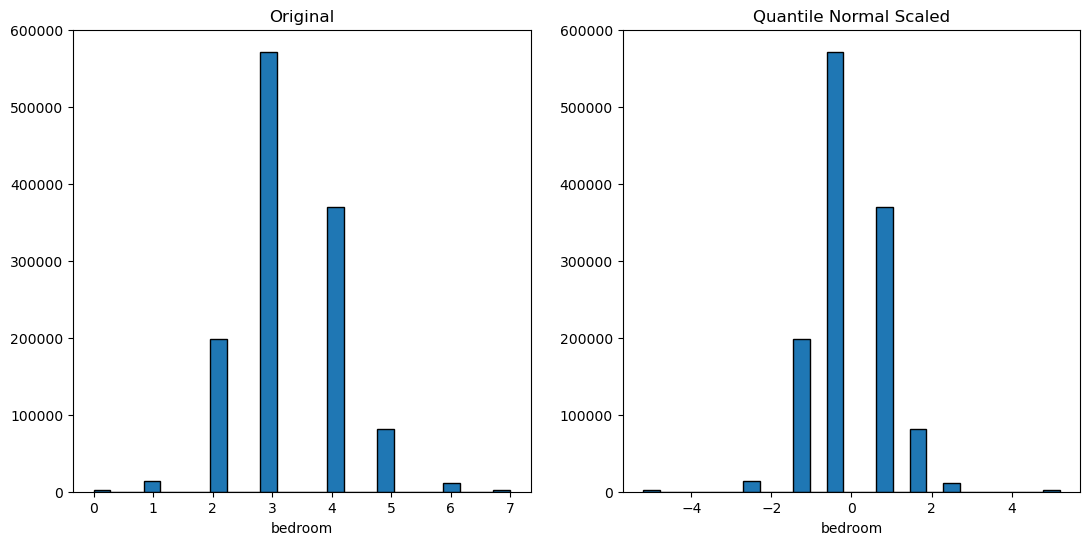

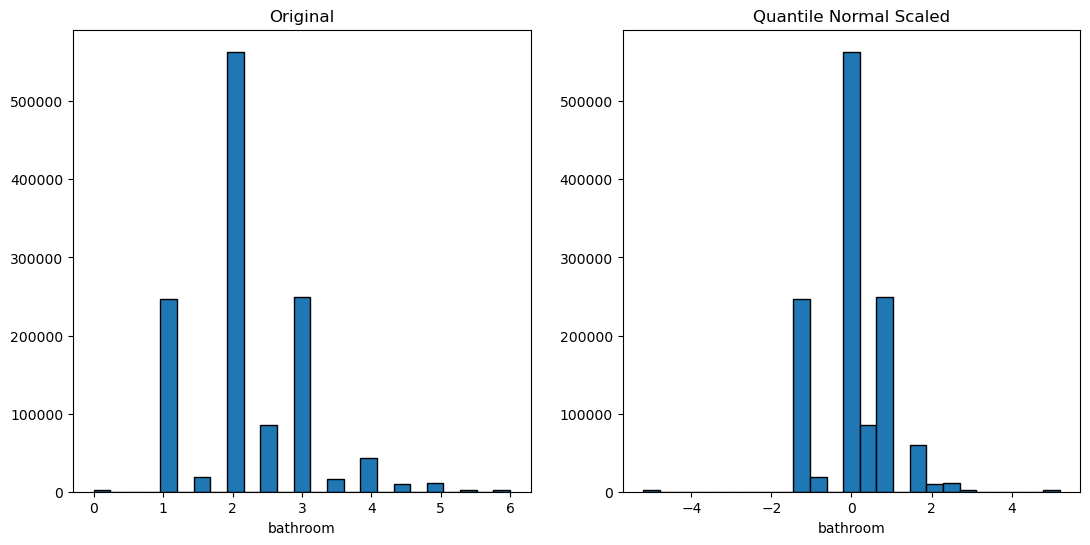

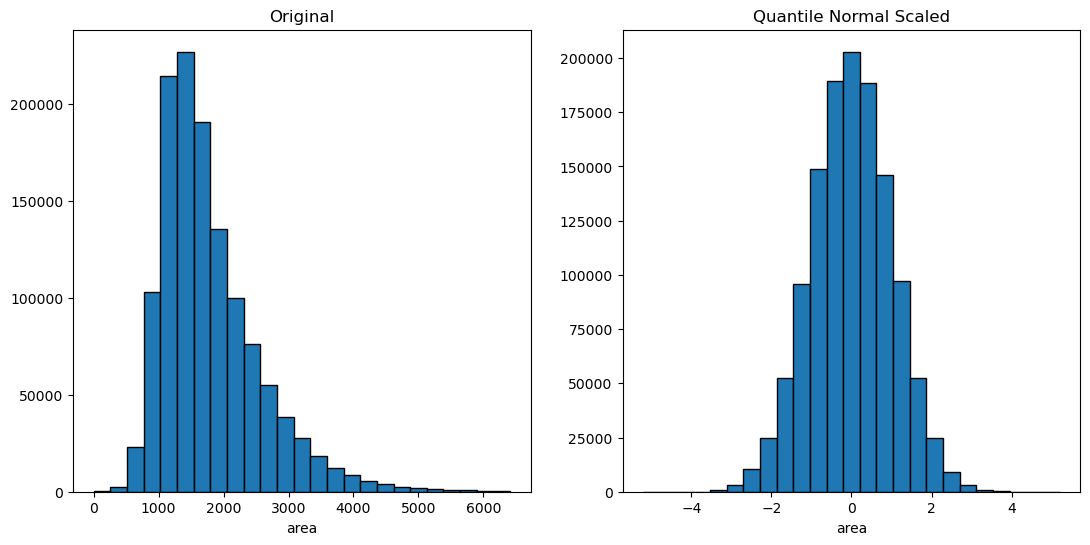

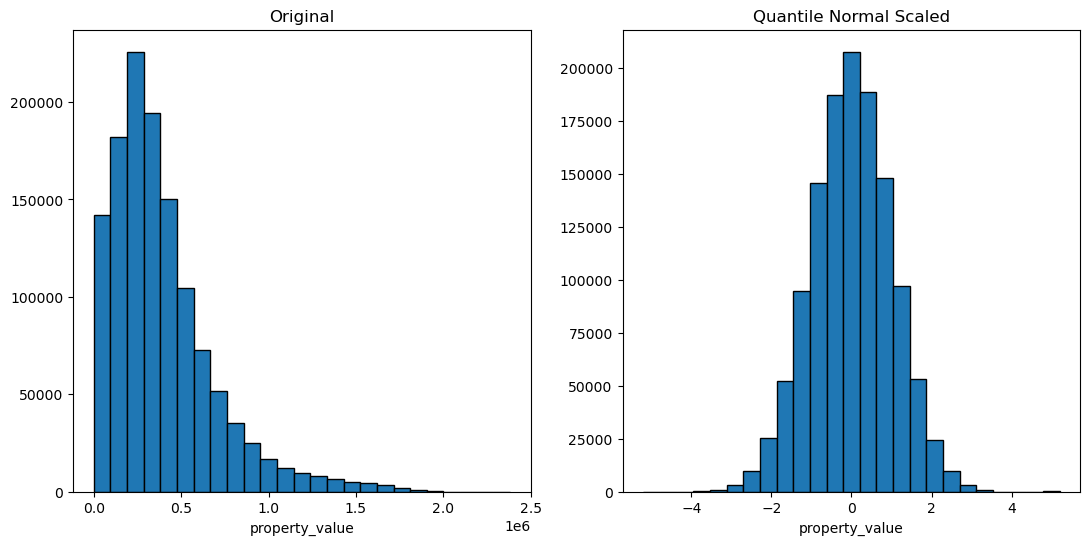

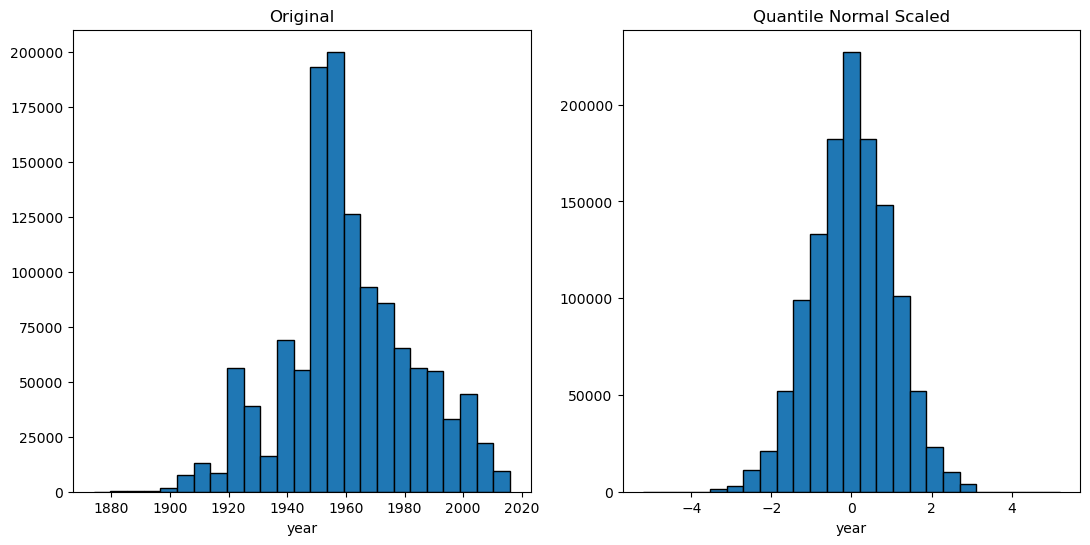

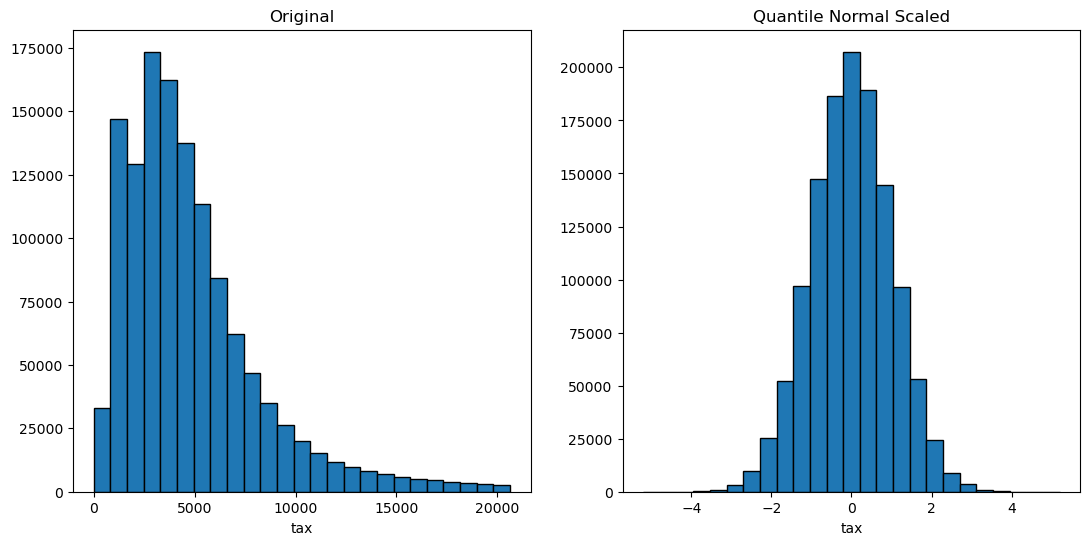

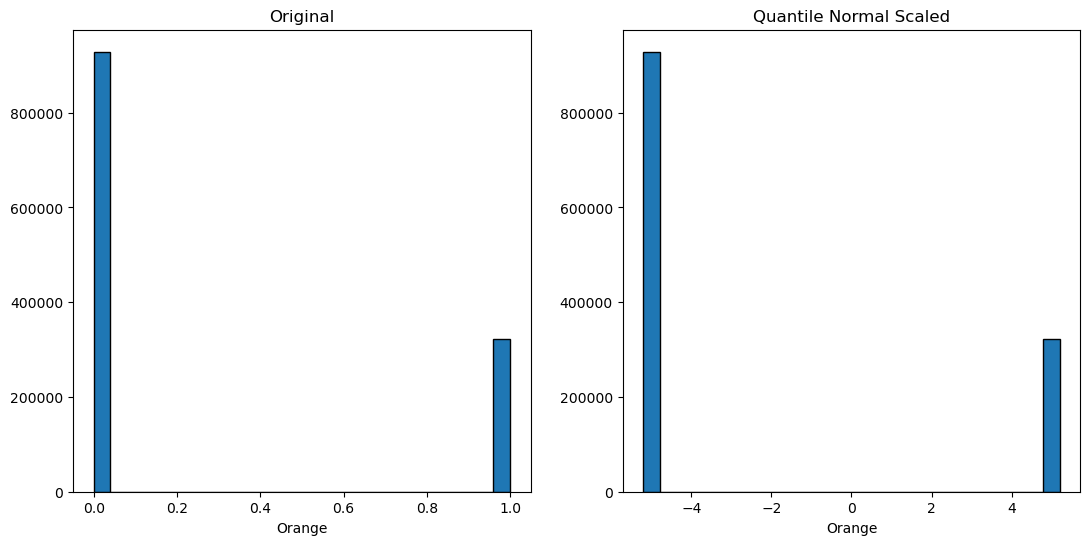

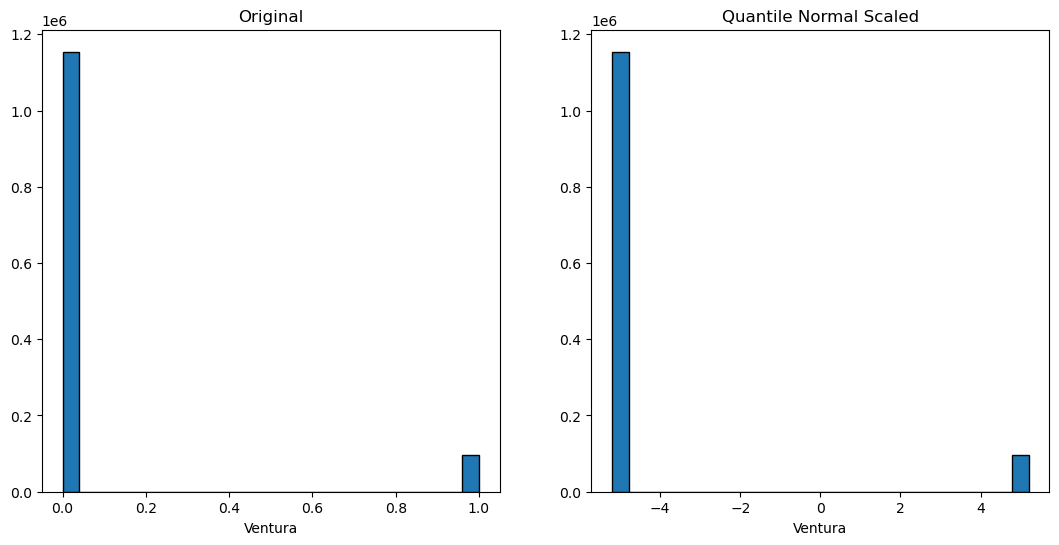

In [76]:
quantile_norm(x_train)

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [84]:
def quantile_scale(x_train):
    '''
    
    '''
    for col in x_train.columns:    
        train_col = x_train[[col]]
        validate_col = x_validate[[col]]
        scaler = sklearn.preprocessing.QuantileTransformer()

        scaler.fit(train_col[[col]])
        x_train_scaled = scaler.transform(train_col)
        
        
        scaler2 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
        scaler2.fit(train_col[[col]])
        x_train_scaled2 = scaler2.transform(train_col)        
        
        


        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(x_train_scaled, bins=25, ec='black')
        plt.xlabel(col)
        plt.title('Quantile (No Parameters)')
        
        plt.subplot(122)
        plt.hist(x_train_scaled2, bins=25, ec='black')
        plt.title('Quantile (Normal)')
        plt.xlabel(col)

In [118]:
def quantile_scale2(train):
    '''
    
    '''
    scaler = sklearn.preprocessing.QuantileTransformer()

    scaler.fit(train)
    x_train_scaled = scaler.transform(train)


    scaler2 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    scaler2.fit(train)
    x_train_scaled2 = scaler2.transform(train)        




    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(x_train_scaled, bins=25, ec='black')

    plt.title('Quantile (No Parameters)')

    plt.subplot(122)
    plt.hist(x_train_scaled2, bins=25, ec='black')
    plt.title('Quantile (Normal)')


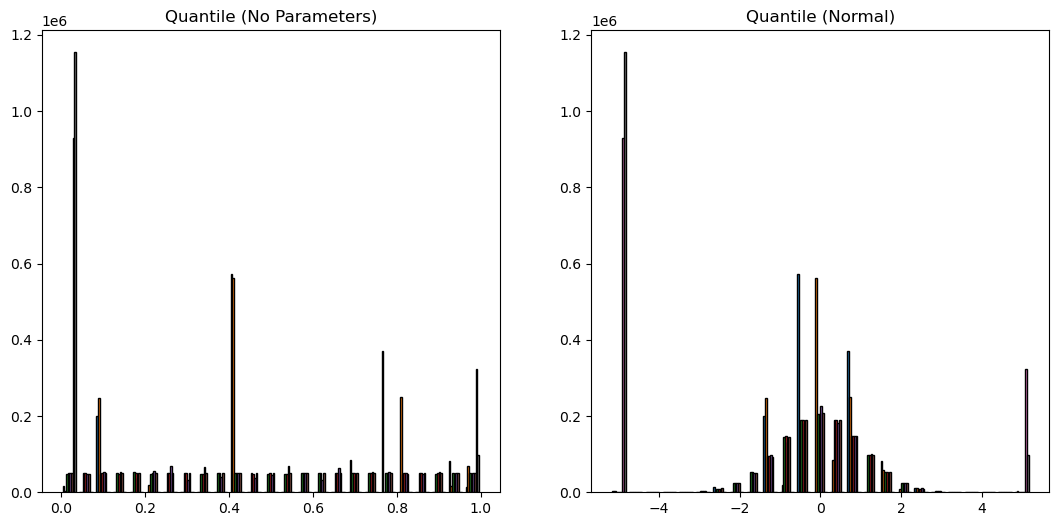

In [120]:
quantile_scale2(x_train)

 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def mm_scale1(train, validate, test):

    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)


    x_train_scaled = scaler.transform(train)
    x_validate_scaled = scaler.transform(validate)
    x_test_scaled = scaler.transform(test)
    
    return x_train_scaled, x_validate_scaled, x_test_scaled


In [ ]:
x_train_scaled, x_validate_scaled, x_test_scaled = mm_scale1(train[["bedroom", "bathroom","area", "year", "tax", "orange", "ventura"]], validate[["bedroom", "bathroom","area", "year", "tax", "orange", "ventura"]], test[["bedroom", "bathroom","area", "year", "tax", "orange", "ventura"]])

In [ ]:
x_train_scaled

In [5]:
df

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152858,2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0
